# Importing relavent packages and pulling data from database mysql


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import sqlite3
import string
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer


con=sqlite3.connect('F:/1Masters/database.sqlite')

In [2]:
#Selecting all the records from the database
data=pd.read_sql_query("""
SELECT *FROM Reviews """,con)
data

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...
9,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...


In [3]:
filtered_data=pd.read_sql_query("""
SELECT *FROM Reviews WHERE Score !=3""",con)

def partition(x):
    if x<3:
        return 'negative'  #Making reviews positive or negative based on score indicator 
    return 'positive'

actualScore=filtered_data['Score']
PositiveNegative=actualScore.map(partition)
filtered_data['Score']=PositiveNegative

In [4]:
filtered_data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,positive,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,negative,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,positive,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,negative,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,positive,1350777600,Great taffy,Great taffy at a great price. There was a wid...


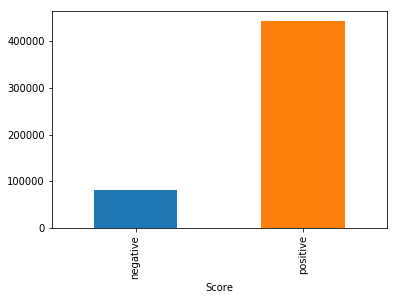

In [5]:
filtered_data.groupby("Score")["Id"].count().plot.bar() 
#This part of code gives the number of positive point and negative points using bar graph

# Data cleaning and Preprocessing

In [6]:
#All the duplicate values are droped 
sorted_data=filtered_data.sort_values('ProductId',axis=0,ascending=True)
final=sorted_data.drop_duplicates(subset={'UserId','ProfileName','Time','Text'},keep='first',inplace=False)
final.shape


(364173, 10)

In [7]:
# value of HelpfulnessNumerator is greater than HelpfulnessDenominator 
#which is not practically possible hence these two rows too are removed from calculations
final=final[final.HelpfulnessDenominator>=final.HelpfulnessNumerator]
final.shape

(364171, 10)

# Text preprocessing
Removing HTML tags.
Removing special characters from text.
converting all the text to lower case.
To check if word is English or alpha-numeric
Removing stop words from sentence.
Consider only review which are more than two words.

In [9]:
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer


stop=set(stopwords.words('english')) #set of stop words
sno=nltk.stem.SnowballStemmer('english')#initialising stemmer


def cleanhtml(sentence):
    cleanr=re.compile('<.*?')
    cleantext=re.sub(cleanr, ' ',sentence)
    return cleantext

def cleanpunc(sentence):
    cleaned=re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned=re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return cleaned


In [10]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Manish\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
i=0
str1=' '
final_string=[]
all_positive_words=[]
all_negative_words=[]
s=''

for sent in final['Text'].values:
    filtered_sentence=[]
    sent=cleanhtml(sent)#remove html tags
    for w in sent.split():
        for cleaned_words in cleanpunc(w).split():
            if((cleaned_words.isalpha()) & (len(cleaned_words)>2)) :
                if(cleaned_words.lower() not in stop):
                    s=(sno.stem(cleaned_words.lower())).encode('utf8')
                    filtered_sentence.append(s)
                    if(final['Score'].values)[i]== 'positive':
                        all_positive_words.append(s)
                    if(final['Score'].values)[i]== 'negative':
                        all_negative_words.append(s)
                        
                else:
                    continue
            else:
                continue 
            
    str1=b" ".join(filtered_sentence)
    
    final_string.append(str1)
    i+=1
    
    

    









In [12]:
final['cleanedText']=final_string #Creating new column in the dataframe and adding the preprocessed text

In [13]:
final.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,cleanedText
138706,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,positive,939340800,EVERY book is educational,this witty little book makes my son laugh at l...,b'witti littl book make son laugh loud recit c...
138688,150506,0006641040,A2IW4PEEKO2R0U,Tracy,1,1,positive,1194739200,"Love the book, miss the hard cover version","I grew up reading these Sendak books, and watc...",b'grew read sendak book watch realli rosi movi...
138689,150507,0006641040,A1S4A3IQ2MU7V4,"sally sue ""sally sue""",1,1,positive,1191456000,chicken soup with rice months,This is a fun way for children to learn their ...,b'fun way children learn month year learn poem...
138690,150508,0006641040,AZGXZ2UUK6X,"Catherine Hallberg ""(Kate)""",1,1,positive,1076025600,a good swingy rhythm for reading aloud,This is a great little book to read aloud- it ...,b'great littl book read nice rhythm well good ...
138691,150509,0006641040,A3CMRKGE0P909G,Teresa,3,4,positive,1018396800,A great way to learn the months,This is a book of poetry about the months of t...,b'book poetri month year goe month cute littl ...


In [14]:
#This part of code gives the frequency distribution of the positive words and negative words

freq_dist_positive=nltk.FreqDist(all_positive_words)
freq_dist_negative=nltk.FreqDist(all_negative_words)
print("Most Common Positive Words :" , freq_dist_positive.most_common(20))
print("Most Common Negative Words :" , freq_dist_negative.most_common(20))


Most Common Positive Words : [(b'like', 139150), (b'tast', 128631), (b'good', 112216), (b'flavor', 109473), (b'love', 107034), (b'use', 103627), (b'great', 102818), (b'product', 99504), (b'one', 95360), (b'tri', 86237), (b'tea', 83824), (b'coffe', 78610), (b'make', 74835), (b'get', 71962), (b'food', 64752), (b'amazon', 57832), (b'would', 55297), (b'time', 55225), (b'buy', 53903), (b'realli', 52569)]
Most Common Negative Words : [(b'tast', 34489), (b'like', 32284), (b'product', 29504), (b'one', 20420), (b'flavor', 19561), (b'would', 17901), (b'tri', 17676), (b'use', 15275), (b'good', 14977), (b'coffe', 14677), (b'get', 13758), (b'buy', 13690), (b'order', 12846), (b'food', 12742), (b'dont', 11683), (b'tea', 11657), (b'amazon', 11258), (b'even', 10983), (b'box', 10841), (b'make', 9816)]


In [15]:
#Bi-gram, Tri-gram
count_vector=CountVectorizer(ngram_range=(1,2))
final_bigram_counts=count_vector.fit_transform(final['Text'].values)

In [16]:
type(final_bigram_counts)

scipy.sparse.csr.csr_matrix

In [41]:
clean_df = pd.DataFrame(final,columns=['cleanedText'])
clean_df['target'] = final.Score
clean_df.head()

,cleanedText,target
138706,b'witti littl book make son laugh loud recit c...,positive
138688,b'grew read sendak book watch realli rosi movi...,positive
138689,b'fun way children learn month year learn poem...,positive
138690,b'great littl book read nice rhythm well good ...,positive
138691,b'book poetri month year goe month cute littl ...,positive


In [43]:
clean_df.to_csv('clean_final1.csv',encoding='utf-8')
csv = 'clean_final1.csv'
my_df = pd.read_csv(csv,index_col=0)
my_df.count()

cleanedText    364171
target         364171
dtype: int64

# Starting my spark session

In [20]:
import findspark
findspark.init()
import pyspark as ps
import warnings
from pyspark.sql import SQLContext

In [44]:
dataset = spark.read.csv('clean_final1.csv',inferSchema=True, header =True)

In [45]:
dataset.show()

+------+--------------------+--------+
|   _c0|         cleanedText|  target|
+------+--------------------+--------+
|138706|b'witti littl boo...|positive|
|138688|b'grew read senda...|positive|
|138689|b'fun way childre...|positive|
|138690|b'great littl boo...|positive|
|138691|b'book poetri mon...|positive|
|138693|b'charm rhyme boo...|positive|
|138694|b'set asid least ...|positive|
|138695|b'rememb book chi...|positive|
|138696|b'great book ador...|positive|
|138697|b'book famili fav...|positive|
|138687|b'get movi sound ...|positive|
|138698|b'author wrote wi...|positive|
|138700|b'great book perf...|positive|
|138701|b'ive alway love ...|positive|
|138702|b'book purchas bi...|positive|
|138703|b'year old daught...|positive|
|138704|b'book contain co...|positive|
|138705|b'young boy descr...|positive|
|138707|b'daughter love r...|positive|
|138708|b'one best childr...|negative|
+------+--------------------+--------+
only showing top 20 rows



In [46]:
dataset.show(5)

+------+--------------------+--------+
|   _c0|         cleanedText|  target|
+------+--------------------+--------+
|138706|b'witti littl boo...|positive|
|138688|b'grew read senda...|positive|
|138689|b'fun way childre...|positive|
|138690|b'great littl boo...|positive|
|138691|b'book poetri mon...|positive|
+------+--------------------+--------+
only showing top 5 rows



In [47]:
#splitting the data
(train_set, val_set, test_set) = dataset.randomSplit([0.98, 0.01, 0.01], seed = 2000)

In [49]:
from pyspark.ml.feature import HashingTF, IDF, Tokenizer, CountVectorizer
from pyspark.ml.feature import StringIndexer
from pyspark.ml import Pipeline
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator

from pyspark.ml.feature import HashingTF, IDF, Tokenizer
from pyspark.ml.feature import StringIndexer
from pyspark.ml import Pipeline

#Using piple to stage the workflows 
#using tf-idf for vectorization

tokenizer = Tokenizer(inputCol="cleanedText", outputCol="words")
hashtf = HashingTF(numFeatures=2**16, inputCol="words", outputCol='tf')
idf = IDF(inputCol='tf', outputCol="features", minDocFreq=5) #minDocFreq: remove sparse terms
label_stringIdx = StringIndexer(inputCol = "target", outputCol = "label")
pipeline = Pipeline(stages=[tokenizer, hashtf, idf, label_stringIdx])

pipelineFit = pipeline.fit(train_set)
train_df = pipelineFit.transform(train_set)
val_df = pipelineFit.transform(val_set)
train_df.show(5)

+---+--------------------+--------+--------------------+--------------------+--------------------+-----+
|_c0|         cleanedText|  target|               words|                  tf|            features|label|
+---+--------------------+--------+--------------------+--------------------+--------------------+-----+
|  8|b'right most spro...|positive|[b'right, most, s...|(65536,[12793,233...|(65536,[12793,233...|  0.0|
| 10|b'dont know cactu...|positive|[b'dont, know, ca...|(65536,[637,1198,...|(65536,[637,1198,...|  0.0|
| 11|b'one boy need lo...|positive|[b'one, boy, need...|(65536,[1353,4042...|(65536,[1353,4042...|  0.0|
| 12|b'cat happili eat...|negative|[b'cat, happili, ...|(65536,[7338,9506...|(65536,[7338,9506...|  1.0|
| 48|b'got free packag...|positive|[b'got, free, pac...|(65536,[1951,4853...|(65536,[1951,4853...|  0.0|
+---+--------------------+--------+--------------------+--------------------+--------------------+-----+
only showing top 5 rows



In [50]:
from pyspark.ml.classification import LogisticRegression
lr = LogisticRegression(maxIter=100)
lrModel = lr.fit(train_df)
predictions = lrModel.transform(val_df)

In [51]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
evaluator = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction")
evaluator.evaluate(predictions)

0.9150561992473734

In [52]:
accuracy = predictions.filter(predictions.label == predictions.prediction).count() / float(val_set.count())
accuracy


0.9184597961494904